In [ ]:
"C:\Users\hp\Downloads\heart.csv"

In [2]:
import pandas as pd

# Load the downloaded CSV file
df = pd.read_csv(r"C:\Users\hp\Downloads\heart.csv")  # Replace with your actual file name if different
print(df.head())
print(df.info())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Scale numeric features (optional but improves model performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Show shapes to confirm
print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (734, 15)
Test Set Shape: (184, 15)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train & Evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Show results in table
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='F1 Score', ascending=False))

                    Model  Accuracy  Precision    Recall  F1 Score
3  Support Vector Machine  0.875000   0.903846  0.878505  0.890995
2           Random Forest  0.864130   0.894231  0.869159  0.881517
0     Logistic Regression  0.853261   0.900000  0.841121  0.869565
1           Decision Tree  0.842391   0.861111  0.869159  0.865116


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store results
tuned_rf_result = {
    'Model': 'Random Forest (GridSearch)',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
}

print("Best Parameters (RF):", grid_rf.best_params_)
print("Tuned RF Metrics:", tuned_rf_result)

Best Parameters (RF): {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Tuned RF Metrics: {'Model': 'Random Forest (GridSearch)', 'Accuracy': 0.8695652173913043, 'Precision': 0.8952380952380953, 'Recall': 0.8785046728971962, 'F1 Score': 0.8867924528301887}


In [7]:
{'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}

{'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}

In [8]:
from sklearn.model_selection import RandomizedSearchCV

param_dist_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

random_search_svm = RandomizedSearchCV(SVC(), param_distributions=param_dist_svm, n_iter=5, cv=5, scoring='f1', random_state=42)
random_search_svm.fit(X_train, y_train)

best_svm = random_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

tuned_svm_result = {
    'Model': 'SVM (RandomSearch)',
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1 Score': f1_score(y_test, y_pred_svm)
}

print("Best Parameters (SVM):", random_search_svm.best_params_)
print("Tuned SVM Metrics:", tuned_svm_result)

Best Parameters (SVM): {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Tuned SVM Metrics: {'Model': 'SVM (RandomSearch)', 'Accuracy': 0.8586956521739131, 'Precision': 0.900990099009901, 'Recall': 0.8504672897196262, 'F1 Score': 0.875}


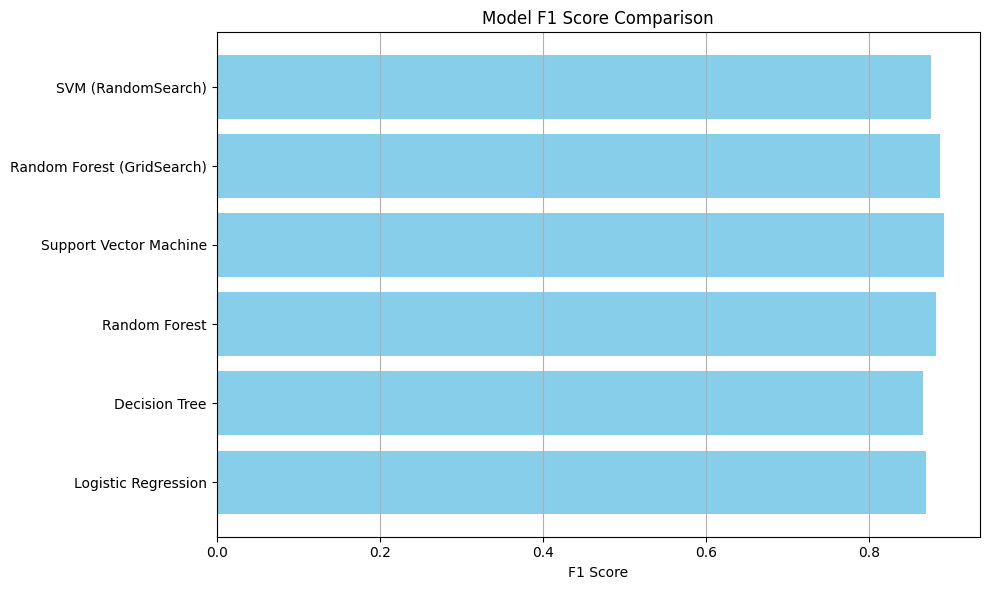

In [9]:
import matplotlib.pyplot as plt

# Add tuned models to results list if not already added
results.append(tuned_rf_result)
results.append(tuned_svm_result)

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plot F1 Score Comparison
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['F1 Score'], color='skyblue')
plt.xlabel("F1 Score")
plt.title("Model F1 Score Comparison")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


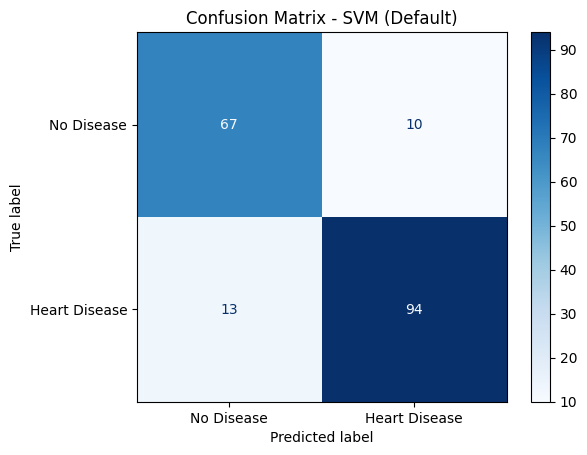

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Fit SVM default again (optional)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Heart Disease"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM (Default)")
plt.show()


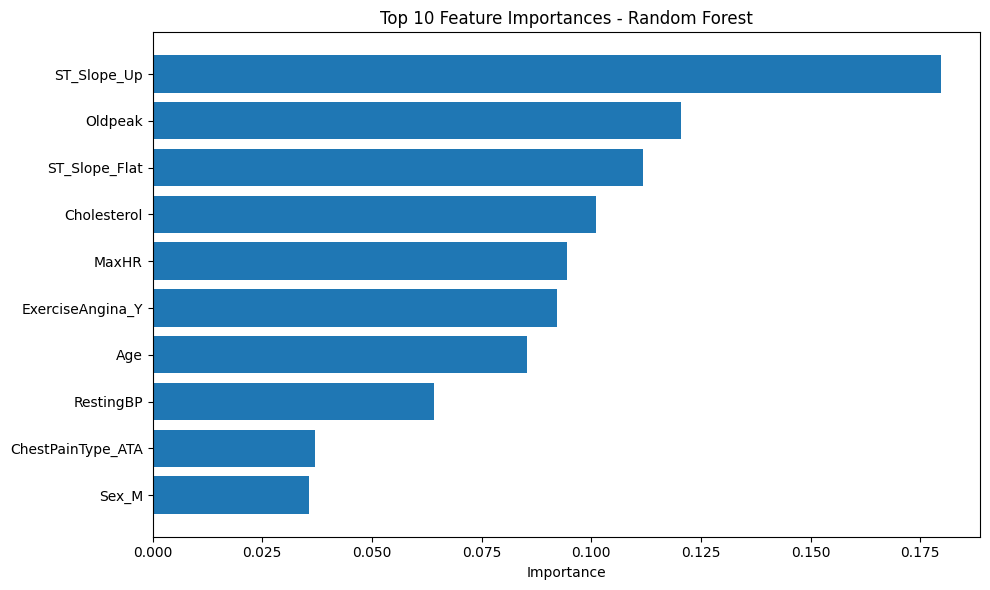

In [11]:
import numpy as np

# Fit best random forest
best_rf.fit(X_train, y_train)

# Get feature names
feature_names = X.columns

# Plot top features
importances = best_rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()
